In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import *

In [2]:
L, E0 = 10, 0.4 # (-L, L) - симметричный отрезок, на краях |psi(+-L)| = 0; E0 - начальное приближение основного уровня
N, M = 2000, 20 # N - кол-во интервалов разбиения по x; M - кол-во итераций
h = 2 * L / N   # шаг по пространственной сетке
r = 1 / h**2    # для удобства обозн. в матрице

In [3]:
U = lambda x: x**2 / 2 # ф-ия потенциала

In [4]:
x = np.linspace(-L, L, N + 1) # массив x
u = U(x)                      # массив значений потенциала в узлах сетки

In [5]:
def TMA(e):
    # на вход подается вектор e, решается система A.e1 = e, где A:
    # первая/последняя строки - гран. условия, имеют только элементы 11 и nn
    # остальные строки: ур-ия -r/2 psi_i-1 + (r + U_i) psi_i - r/2 psi_i+1 == e_i
    A = np.array([0] + [  -r / 2 for i in range(N - 1)] + [0])
    B = np.array(      [u[i] + r for i in range(N + 1)]      )
    C = np.array([0] + [  -r / 2 for i in range(N - 1)] + [0])
    D = e
    for i in range(1, N + 1):
        xi = A[i] / B[i - 1]
        B[i] -= xi * C[i - 1]
        D[i] -= xi * D[i - 1]
    W = np.zeros(N + 1)
    W[-1] = D[-1] / B[-1]
    for i in range(N - 1, -1, -1):
        W[i] = (D[i] - C[i] * W[i + 1]) / B[i]
    return W

In [6]:
def norm(a): # возвращает норму вектора
    return sum(a**2) ** 0.5

In [7]:
e0 = abs(x)    # np.random.random(N + 1)
e0 /= norm(e0) # нормированный начальный вектор

In [8]:
def eigen_sol(start):
    # на M итерациях решает ур-ие A.e_n+1 = e_n
    # выводит основной ур-нь энергии, погрешность (модуль разности с предыдущим вычислением), 
    # нормированную волновую функцию осн. сост.
    eigvec = start
    eigval = E0
    for i in range(M):
        eigvec = TMA(eigvec)
        n = norm(eigvec)
        last = eigval
        eigval = 1 / n
        eigvec /= n
    return eigval, abs(eigval - last), eigvec

In [9]:
E, delta, psi = eigen_sol(e0)

In [10]:
E, delta

(0.49999687498046264, 4.440892098500626e-16)

In [11]:
n = norm(np.exp(-x**2 / 2))
x0 = np.linspace(-10, 10, 1000)
exact = np.exp(-x0**2 / 2) / n  # аналитическое решение (нормированное на численное решение)

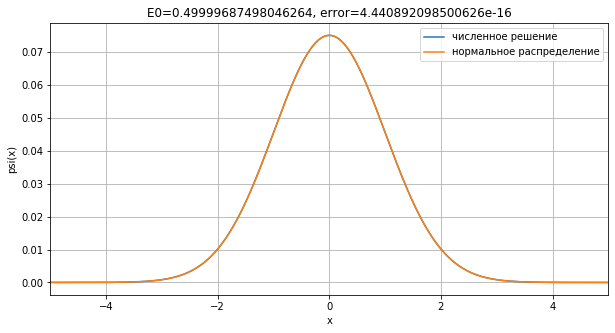

In [14]:
plt.figure(figsize=(10,5))
plt.plot(x, psi, label='численное решение')
plt.plot(x0, exact, label='нормальное распределение')
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.grid()
plt.xlim([-5,5])
plt.legend()
plt.title('E0='+str(E)+', error='+str(delta))
plt.show()